In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [84]:
import pandas as pd

In [85]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [46]:
df = pd.read_csv("breaking_bad.csv",encoding="latin-1")
df

,Date,Season,Episode,Title,Directed by,Written by,Duration_mins,Summary,Rating_IMDB,U.S. viewers_million
0,20-Jan-08,1,1,Pilot,Vince Gilligan,Vince Gilligan,58,"Diagnosed with terminal lung cancer, chemistry...",9.1,1.41
1,27-Jan-08,1,2,Cat's in the Bag...,Adam Bernstein,Vince Gilligan,48,After their first drug deal goes terribly wron...,8.7,1.49
2,10-Feb-08,1,3,...And the Bag's in the River,Adam Bernstein,Vince Gilligan,48,Walt and Jesse clean up after the bathtub inci...,8.8,1.08
3,17-Feb-08,1,4,Cancer Man,Jim McKay,Vince Gilligan,48,Walt tells the rest of his family about his ca...,8.3,1.09
4,24-Feb-08,1,5,Gray Matter,Tricia Brock,"Vince Gilligan, Patty Lin",48,Walt rejects everyone who tries to help him wi...,8.4,0.97
...,...,...,...,...,...,...,...,...,...,...
57,01-Sep-13,5,12,Rabid Dog,Sam Catlin,"Vince Gilligan, Sam Catlin",48,Walt discovers Jesse broke into his house and ...,9.2,4.41
58,08-Sep-13,5,13,To'hajiilee,Michelle MacLaren,"Vince Gilligan, George Mastras",47,Jesse and Hank come up with an idea to take Wa...,9.8,5.11
59,15-Sep-13,5,14,Ozymandias,Rian Johnson,"Vince Gilligan, Moira Walley-Beckett",48,Walt goes on the run. Jesse is taken hostage. ...,10.0,6.37
60,22-Sep-13,5,15,Granite State,Peter Gould,"Vince Gilligan, Peter Gould",55,Walt struggles as he adapts to aspects of his ...,9.7,6.58


In [11]:
df.columns

Index(['Date', 'Season', 'Episode', 'Title', 'Directed by', 'Written by',
       'Duration_mins', 'Summary', 'Rating_IMDB', 'U.S. viewers_million'],
      dtype='object')

    each columns represent:
        * Date: date on which the episode was released or aired
        * Season: season number of the episode
        * Episode:  episode number within a specific season
        * Title: title of the episode
        * Directed by:  name of the director who directed the episode
        * Written by: name of the writer or writers who wrote the script for the episode
        * Duration_mins: duration of the episode in minutes. It provides length of each episode.
        * Summary: brief summary or synopsis of the episode
        * Rating_IMDB: IMDb (Internet Movie Database) rating of the episode
        * U.S. viewers_million: the number of viewers in the United States who watched the episode during its original airing, measured in millions

In [12]:
df.shape 

(62, 10)

In [13]:
df.size

620

In [14]:
# there are 62 rows and 10 columns with 620 elements

In [15]:
df.count() # non-null values

Date                    62
Season                  62
Episode                 62
Title                   62
Directed by             62
Written by              62
Duration_mins           62
Summary                 62
Rating_IMDB             62
U.S. viewers_million    57
dtype: int64

In [17]:
df.isnull().sum() # null values,there are 5 null value in the "U.S. viewers_million" column 

Date                    0
Season                  0
Episode                 0
Title                   0
Directed by             0
Written by              0
Duration_mins           0
Summary                 0
Rating_IMDB             0
U.S. viewers_million    5
dtype: int64

In [18]:
df["U.S. viewers_million"].fillna(df["U.S. viewers_million"].mode()[0],inplace=True)
# to fill null value in the "U.S. viewers_million" column 

In [20]:
df.isnull().sum() # now there is no null values

Date                    0
Season                  0
Episode                 0
Title                   0
Directed by             0
Written by              0
Duration_mins           0
Summary                 0
Rating_IMDB             0
U.S. viewers_million    0
dtype: int64

In [21]:
df.head() # now we get an idea about each column in the dataset

,Date,Season,Episode,Title,Directed by,Written by,Duration_mins,Summary,Rating_IMDB,U.S. viewers_million
0,20-Jan-08,1,1,Pilot,Vince Gilligan,Vince Gilligan,58,"Diagnosed with terminal lung cancer, chemistry...",9.1,1.41
1,27-Jan-08,1,2,Cat's in the Bag...,Adam Bernstein,Vince Gilligan,48,After their first drug deal goes terribly wron...,8.7,1.49
2,10-Feb-08,1,3,...And the Bag's in the River,Adam Bernstein,Vince Gilligan,48,Walt and Jesse clean up after the bathtub inci...,8.8,1.08
3,17-Feb-08,1,4,Cancer Man,Jim McKay,Vince Gilligan,48,Walt tells the rest of his family about his ca...,8.3,1.09
4,24-Feb-08,1,5,Gray Matter,Tricia Brock,"Vince Gilligan, Patty Lin",48,Walt rejects everyone who tries to help him wi...,8.4,0.97


In [23]:
df["Season"].nunique() # there are 5 seasons in the series "BREAKING BAD"

5

In [24]:
df["Season"].unique() 

array([1, 2, 3, 4, 5], dtype=int64)

In [25]:
season_grp = df.groupby("Season")

In [26]:
season_grp["Episode"].max()

Season
1     7
2    13
3    13
4    13
5    16
Name: Episode, dtype: int64

    -here shows that the number of episodes in each season,
        1 - 7
        2 - 13
        3 - 13
        4 - 13
        5 - 16

In [58]:
season_grp["Rating_IMDB","Episode"].max() 
# here shows that the max rated episode in each season

,Rating_IMDB,Episode
Season,,
1,9.3,7
2,9.3,13
3,9.7,13
4,9.9,13
5,10.0,16


In [63]:
df["Rating_IMDB"].nlargest()
#biggest rating

59    10.0
45     9.9
61     9.9
58     9.8
32     9.7
Name: Rating_IMDB, dtype: float64

In [64]:
df["Rating_IMDB"].nsmallest()
#the least ratings

29    7.8
35    8.1
3     8.3
10    8.3
23    8.3
Name: Rating_IMDB, dtype: float64

In [30]:
season_grp[["U.S. viewers_million","Episode"]].max()
# here shows that the max viewed episode in each season

,U.S. viewers_million,Episode
Season,,
1,1.50,7
2,1.66,13
3,1.95,13
4,2.58,13
5,10.28,16


In [ ]:
# that is increase in "U.S. viewers_million" indicates high ratings

In [67]:
df["U.S. viewers_million"].nlargest()
#the large number of viewers

61    10.28
60     6.58
59     6.37
54     5.92
58     5.11
Name: U.S. viewers_million, dtype: float64

In [68]:
df["U.S. viewers_million"].nsmallest()
#the small number of viewers

4     0.97
14    1.04
5     1.07
2     1.08
3     1.09
Name: U.S. viewers_million, dtype: float64

In [33]:
season_grp[["Duration_mins","Episode"]].max()

,Duration_mins,Episode
Season,,
1,58,7
2,48,13
3,47,13
4,60,13
5,55,16


In [37]:
df[["Season","Duration_mins"]].groupby("Season").sum()
#total watch time in each series is given

,Duration_mins
Season,
1,346
2,611
3,611
4,627
5,776


In [31]:
df["Directed by"].nunique()
# the series has been directed by 25 different directors

25

In [32]:
df["Directed by"].unique()
# list of directors

array(['Vince Gilligan', 'Adam Bernstein', 'Jim McKay', 'Tricia Brock',
       'Bronwen Hughes', 'Tim Hunter', 'Bryan Cranston', 'Charles Haid',
       'Terry McDonough', 'John Dahl', 'Johan Renck', 'Peter Medak',
       'Félix Enríquez Alcalá', 'Michelle MacLaren', 'Phil Abraham',
       'Colin Bucksey', 'Scott Winant', 'John Shiban', 'Michael Slovis',
       'Rian Johnson', 'David Slade', 'Peter Gould', 'George Mastras',
       'Thomas Schnauz', 'Sam Catlin'], dtype=object)

In [42]:
df[["Episode","Directed by"]].groupby("Directed by").count()
# list of directors with episodes each have directed

,Episode
Directed by,
Adam Bernstein,8
Bronwen Hughes,1
Bryan Cranston,3
Charles Haid,1
Colin Bucksey,4
David Slade,1
Félix Enríquez Alcalá,1
George Mastras,1
Jim McKay,1


In [44]:
df[df["Rating_IMDB"]==10]
#the episode with the 10 stars 14th episode in 5th season,which is the high rated episode

,Date,Season,Episode,Title,Directed by,Written by,Duration_mins,Summary,Rating_IMDB,U.S. viewers_million
59,15-Sep-13,5,14,Ozymandias,Rian Johnson,"Vince Gilligan, Moira Walley-Beckett",48,Walt goes on the run. Jesse is taken hostage. ...,10.0,6.37


In [47]:
df[df["Rating_IMDB"]==10]["Summary"][59]
# summary of most rated episode

'Walt goes on the run. Jesse is taken hostage. Marie convinces Skyler to tell Walter, Jr. the truth.'

In [62]:
df[["U.S. viewers_million","Directed by"]].groupby("Directed by").sum()
#we can check the total viewers according to the directors

,U.S. viewers_million
Directed by,
Adam Bernstein,11.59
Bronwen Hughes,1.07
Bryan Cranston,9.53
Charles Haid,1.60
Colin Bucksey,6.42
David Slade,1.71
Félix Enríquez Alcalá,0.00
George Mastras,2.48
Jim McKay,1.09


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Season,62.0,3.290323,1.359690,1.00,2.00,3.00,4.75,5.00
Episode,62.0,7.048387,4.074822,1.00,4.00,7.00,10.00,16.00
Duration_mins,62.0,47.919355,2.632074,43.00,47.00,47.00,48.00,60.00
Rating_IMDB,62.0,9.022581,0.511962,7.80,8.70,8.90,9.45,10.00
U.S. viewers_million,57.0,2.324386,1.719224,0.97,1.46,1.71,2.29,10.28


<Axes: xlabel='Season', ylabel='U.S. viewers_million'>

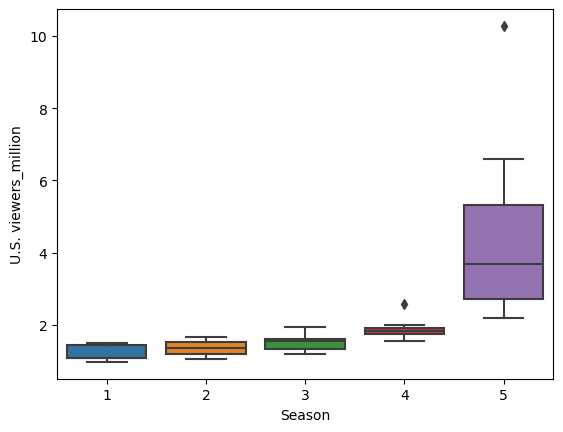

In [75]:
sns.boxplot(x="Season",y="U.S. viewers_million",data=df)
#plotting season against viewers so as to understand the variation

<Axes: xlabel='Season', ylabel='Rating_IMDB'>

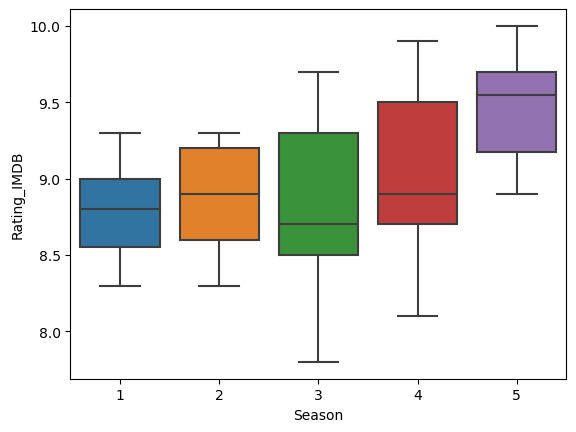

In [77]:
sns.boxplot(x="Season",y="Rating_IMDB",data=df)
#ploting season with rating

<Axes: xlabel='Season', ylabel='Rating_IMDB'>

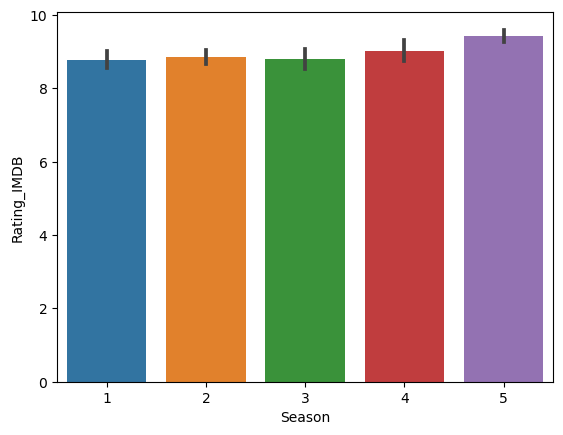

In [78]:
sns.barplot(x="Season",y="Rating_IMDB",data=df)

<Axes: xlabel='Season', ylabel='Episode'>

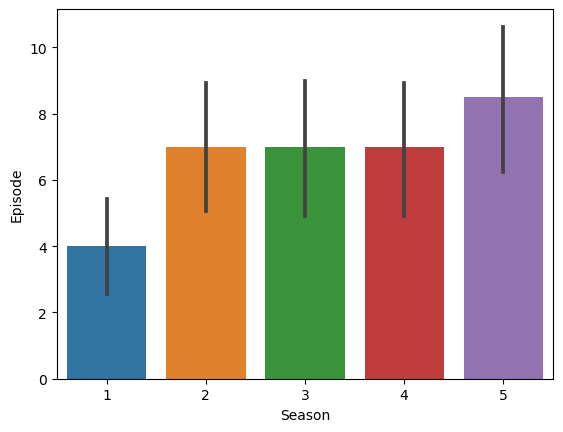

In [79]:
sns.barplot(x="Season",y="Episode",data=df)

In [80]:
df.corr()

,Season,Episode,Duration_mins,Rating_IMDB,U.S. viewers_million
Season,1.000000,0.263719,0.061618,0.435525,0.617048
Episode,0.263719,1.000000,0.059981,0.555829,0.520130
Duration_mins,0.061618,0.059981,1.000000,0.088966,0.342615
Rating_IMDB,0.435525,0.555829,0.088966,1.000000,0.537575
U.S. viewers_million,0.617048,0.520130,0.342615,0.537575,1.000000


In [81]:
# episode show small +ve relation to viewers and rating that is when episode incresead viewers and rating also increasing
# rating shows small +ve relation to season episode and viewers

<Axes: >

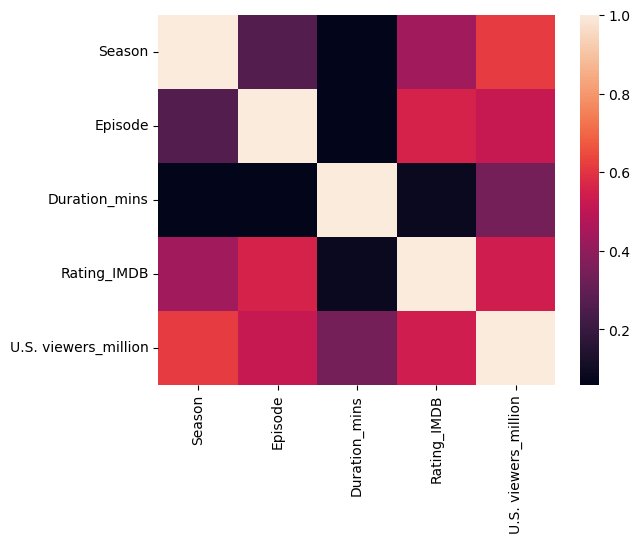

In [82]:
sns.heatmap(df.corr())